In [19]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier,StackingClassifier,ExtraTreesClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax


# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer

pd.set_option('display.max_columns', None)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

In [20]:
df = pd.read_csv("statistic data.csv")

In [21]:
df.drop(["id","voice_breaks","number_of_voice_breaks","number_of_falling","Unnamed: 0"],inplace=True, axis =1 )

In [22]:
df["class"] = df["class"].astype(int)

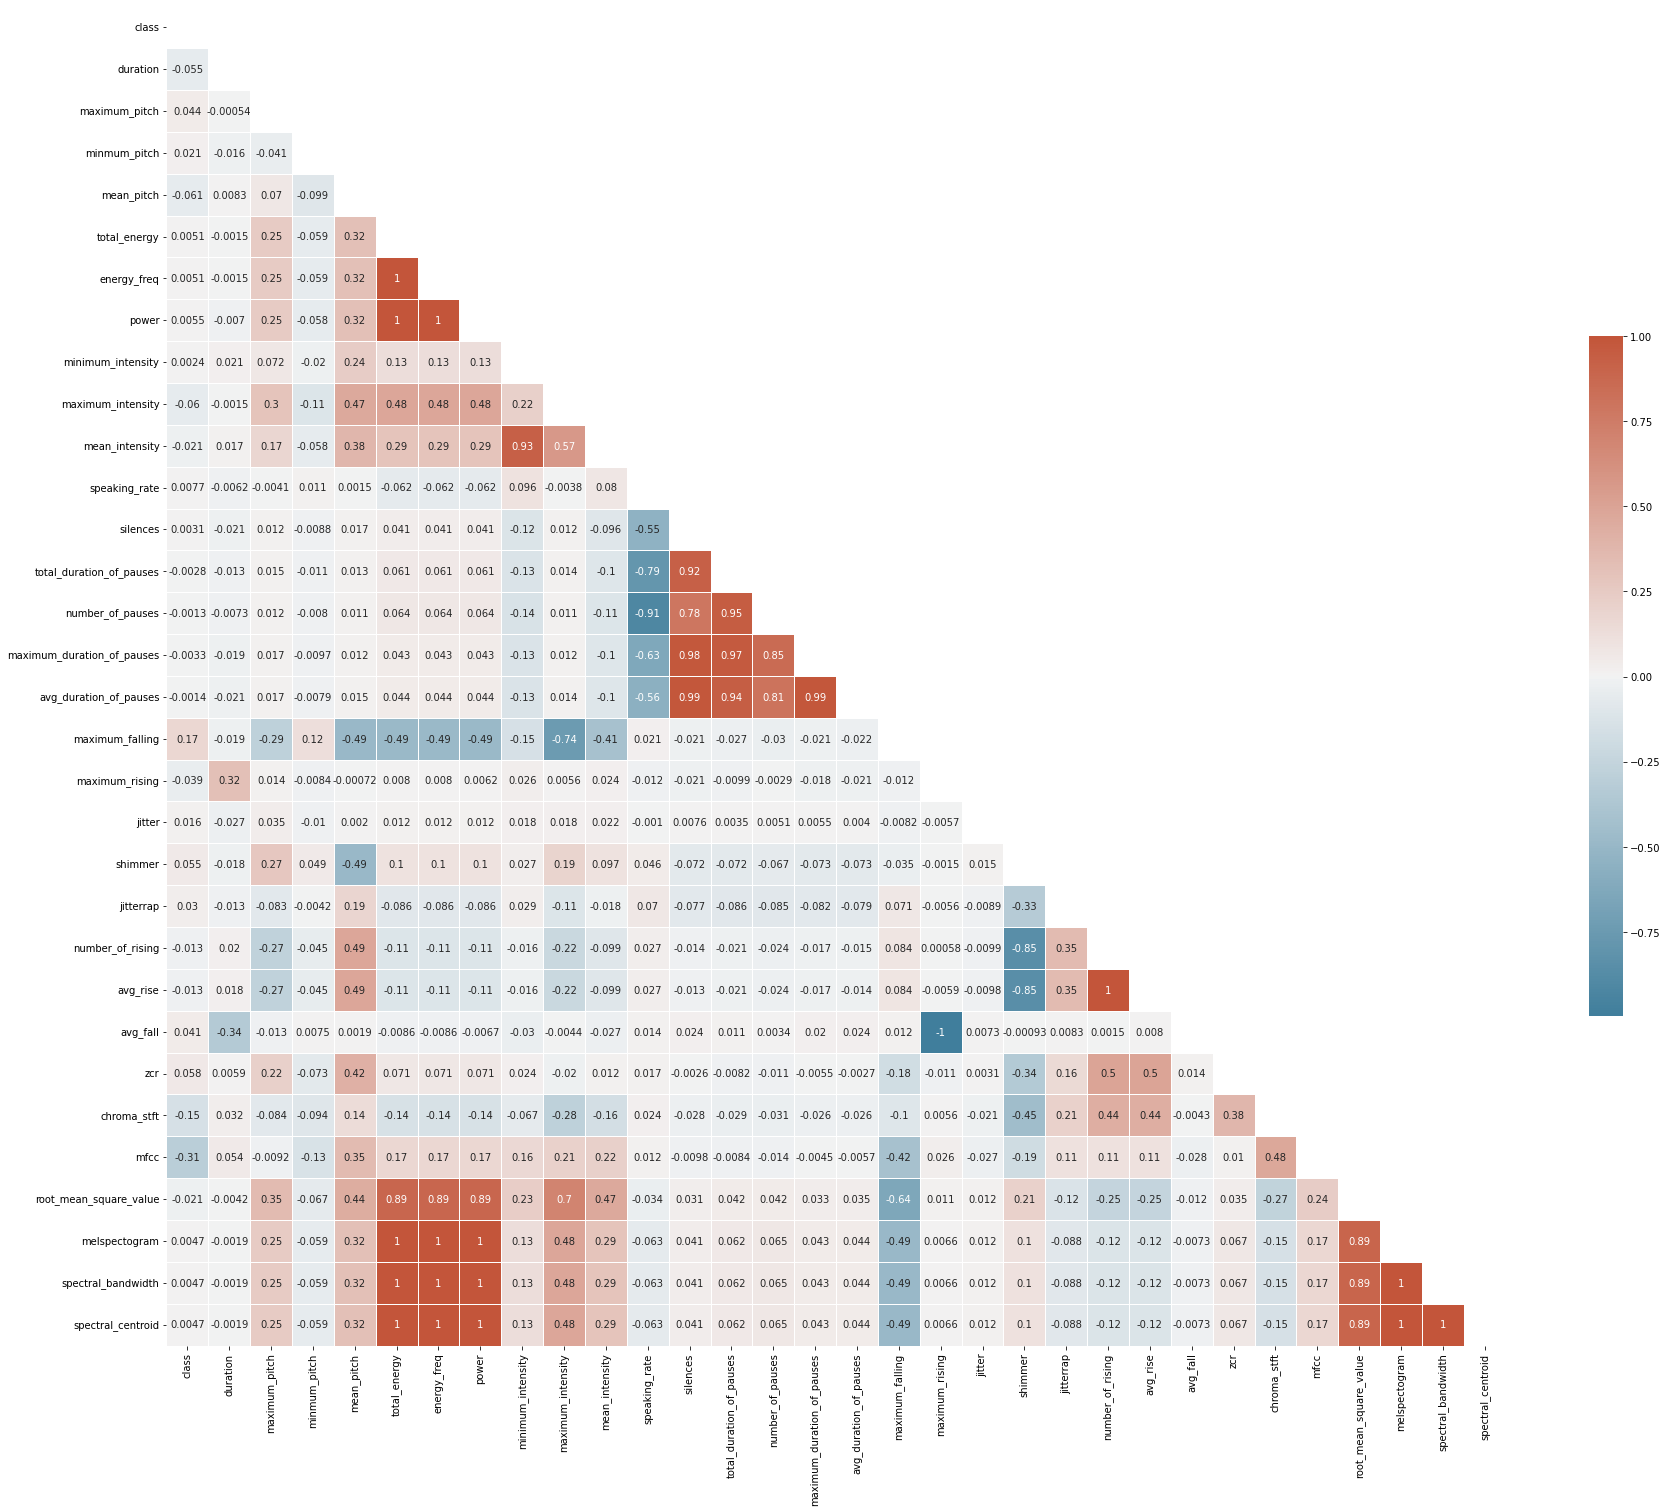

In [23]:
# Correlation Matrix

f, ax = plt.subplots(figsize=(30, 25))
mat = df.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [24]:
df.drop(["total_energy","power","number_of_rising","energy_freq","avg_fall",'spectral_bandwidth','spectral_centroid'],inplace=True, axis =1 )

In [25]:
df['maximum_pitch'].describe()

count     5000.000000
mean      3594.775000
std       2381.740563
min        878.000000
25%       1895.000000
50%       2371.500000
75%       5626.250000
max      24964.000000
Name: maximum_pitch, dtype: float64

In [26]:
# for col in df.columns:
#     q75,q25 = np.percentile(df.loc[:,col],[75,25])
#     intr_qr = q75-q25
 
#     max = q75+(1.5*intr_qr)
#     min = q25-(1.5*intr_qr)
 
#     df.loc[df[col] < min,col] = np.nan
#     df.loc[df[col] > max,col] = np.nan

In [27]:
# df.isna().sum()

In [28]:
# imputer = KNNImputer(n_neighbors=4)
# df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [29]:
df.isna().sum()

class                         0
duration                      0
maximum_pitch                 0
minmum_pitch                  0
mean_pitch                    0
minimum_intensity             0
maximum_intensity             0
mean_intensity                0
speaking_rate                 0
silences                      0
total_duration_of_pauses      0
number_of_pauses              0
maximum_duration_of_pauses    0
avg_duration_of_pauses        0
maximum_falling               0
maximum_rising                0
jitter                        0
shimmer                       0
jitterrap                     0
avg_rise                      0
zcr                           0
chroma_stft                   0
mfcc                          0
root_mean_square_value        0
melspectogram                 0
dtype: int64

In [30]:
# # Correlation Matrix

# f, ax = plt.subplots(figsize=(30, 25))
# mat = df.corr('pearson')
# mask = np.triu(np.ones_like(mat, dtype=bool))
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
# sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})
# plt.show()

In [31]:
# for col in df.columns:
#     if df[col].nunique() == 1:
#         df.drop(col,axis=1 , inplace =True)

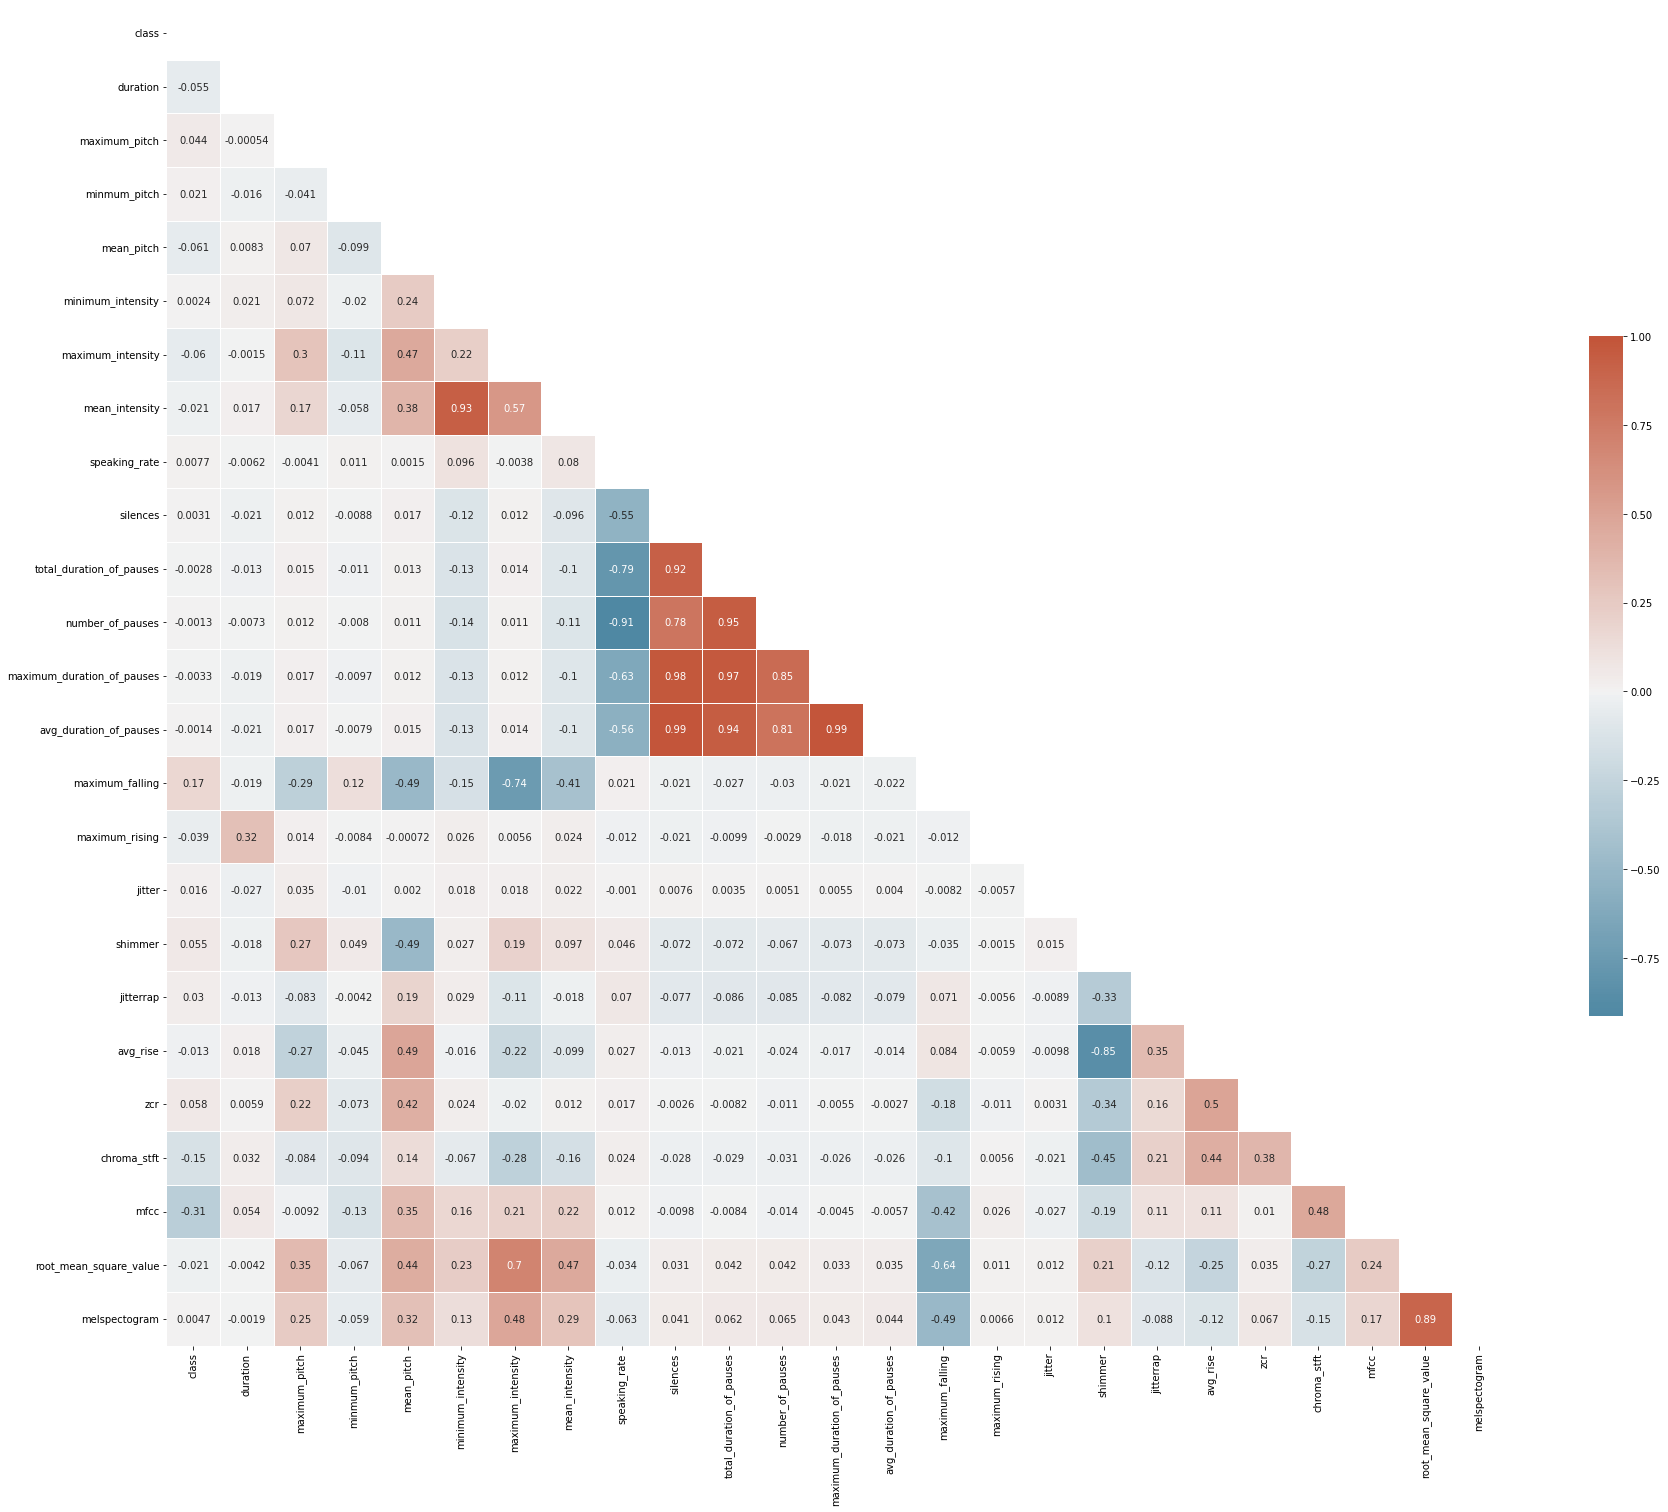

In [32]:
# Correlation Matrix

f, ax = plt.subplots(figsize=(30, 25))
mat = df.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [33]:
# Split features and labels and record our label indices
train_labels = df['class'].reset_index(drop=True)
train_features = df.drop(['class'], axis=1)
train_labels.shape , train_features.shape
X_train,X_val,y_train,y_val= train_test_split(train_features,train_labels,test_size=0.1)

In [34]:
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((4500, 24), (500, 24), (4500,), (500,))

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from math import sqrt
from sklearn.metrics import mean_squared_error
def models_seletion(x_train,y_train):
    models = {
    "RF": RandomForestClassifier(),
    "GBM": GradientBoostingClassifier(),
    "BGC":BaggingClassifier(),
    "DTC":DecisionTreeClassifier(),
    "AB":AdaBoostClassifier(),

    "XGB":XGBClassifier(),
    "LGBM":LGBMClassifier(),
    "CatB":CatBoostClassifier(task_type= 'GPU',verbose=False),
    "EXT":ExtraTreesClassifier(),
    "Log":LogisticRegression()
    }
    df_score=pd.DataFrame(columns=['model_name','f1_mean_score','f1_std_score'])
    list_name=[]
    scores_mean =[]
    scores_std = []
    for name,model in models.items():
        clss=model
        clss.fit(x_train,y_train)
        train_pred =clss.predict(x_train)
        score=cross_val_score(clss,x_train,y_train,cv=5,scoring="accuracy")

        list_name.append(name)
        scores_mean.append(round(abs(score.mean()),5))
        scores_std.append(round(abs(score.std()),5))

        print(list_name)
        print(scores_mean)
        print(scores_std)
    df_score['model_name']=list_name
    df_score['f1_mean_score']=scores_mean
    df_score['f1_std_score']=scores_std
    return df_score.sort_values('f1_mean_score')

In [1]:
df_score= models_seletion(X_train,y_train)

In [ ]:
from sklearn.metrics import f1_score,recall_score,accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# reg = RandomForestClassifier(n_estimators=1000,
#                           max_depth=10,
#                           min_samples_split=5,
#                           min_samples_leaf=5,
#                           max_features=None,
#                           oob_score=True,
#                           random_state=0)

In [3]:
reg =CatBoostClassifier(task_type= 'GPU',verbose=False)

In [ ]:
# estimators =[("RF", RandomForestClassifier(n_estimators=1200,
#                           max_depth=15,
#                           min_samples_split=5,
#                           min_samples_leaf=5,
#                           max_features=None,
#                           oob_score=True,
#                           random_state=0)),
#     ("GBM",GradientBoostingClassifier(n_estimators=1200, 
#                                 learning_rate=0.009636280613755809, 
#                                 max_depth=4, 
#                                 min_samples_leaf=5, 
#                                 min_samples_split=9,  
#                                 random_state=1)),
#     ("CatB",CatBoostClassifier(task_type= 'GPU',verbose=False)),
#     ("XGB",XGBClassifier(max_depth=5,           
#                   learning_rate=0.013272941370633515,    
#                   n_estimators=1876,     
#                   min_child_weight=1,    
#                   colsample_bytree=0.2395378257765287,  
#                   subsample= 0.7496307600223272,         
#                   reg_alpha=0.02152634109282501,         
#                   reg_lambda=0.06544801615179391,
#                   random_state=1)),
#     ("LGBM",LGBMClassifier(learning_rate=0.03,
#                          num_leaves =106,
#                        n_estimators=500,
#                          max_depth = 4,
#                          min_child_samples = 1,
#                          min_split_gain=0, 
#                        subsample=0.4,
#                        subsample_freq=3, 
#                        colsample_bytree=0.6,
#                          reg_alpha=0.008,
#                          reg_lambda=0.03,
#                        verbose=-1))
#                                    ]

# reg = StackingClassifier(estimators=estimators)                                

In [ ]:
reg.fit(X_train,y_train)

In [ ]:
f1_score(y_val, np.round(reg.predict(X_val))),recall_score(y_val, np.round(reg.predict(X_val))),accuracy_score(y_val, np.round(reg.predict(X_val)))

(0.7571644042232277, 0.8311258278145696, 0.678)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.702


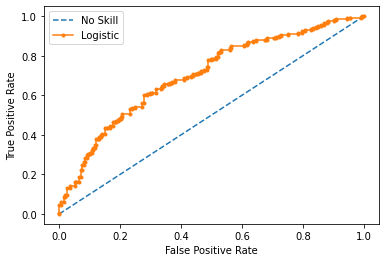

In [ ]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(y_val))]
# predict probabilities
lr_probs = reg.predict_proba(X_val)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_val, ns_probs)
lr_auc = roc_auc_score(y_val, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_val, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_val, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

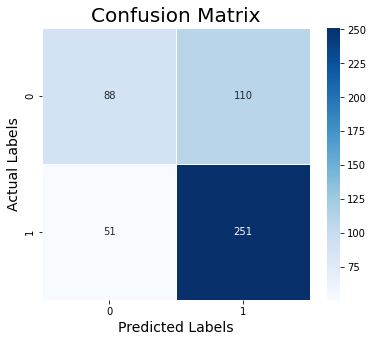

In [ ]:
cm = confusion_matrix(y_val,np.round(reg.predict(X_val)))
plt.figure(figsize = (6, 5))
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
# score=cross_val_score(reg,X_train,y_train,cv=10,scoring="recall")

In [ ]:
# round(abs(score.mean()),5)

In [ ]:
# stack_gen.fit(X_train,y_train)

In [ ]:
test = pd.read_csv("statistic_test_data.csv")

In [ ]:
test.head(2)

,Unnamed: 0,id,class,duration,maximum_pitch,minmum_pitch,mean_pitch,total_energy,energy_freq,power,minimum_intensity,maximum_intensity,mean_intensity,speaking_rate,silences,voice_breaks,total_duration_of_pauses,number_of_pauses,number_of_voice_breaks,maximum_duration_of_pauses,avg_duration_of_pauses,maximum_falling,maximum_rising,jitter,shimmer,jitterrap,number_of_rising,number_of_falling,avg_rise,avg_fall,zcr,chroma_stft,mfcc,root_mean_square_value,melspectogram,spectral_bandwidth,spectral_centroid
0,0,audio_audio.m4a-0001bd17-c03e-4d45-bd62-a5d5ce...,True,10,2202,0,40406.422125,1441.0570,720.528495,144.105701,-250.834099,-32.405802,-141.619951,1.0,0,0,0,0,0,0,0.0,-0.406089,221949,1.224133e-24,0.002572,2.899781e+09,32429,1,0.146106,0.000005,0.039812,0.439331,-19.569702,0.073657,1.693335,1.693335,1.693335
1,1,audio_audio.m4a-0002ace3-106b-40bf-bffa-7ca5c8...,False,10,6146,810,21001.019690,1017.2378,508.618906,101.723779,-249.784420,-33.616043,-141.700232,1.0,0,0,0,0,0,0,0.0,-0.286286,221731,-3.477514e-24,0.003251,2.418237e+09,26479,1,0.119417,0.000005,0.063043,0.213512,-23.011270,0.065775,1.195764,1.195764,1.195764


In [ ]:
test.drop(["id","voice_breaks","number_of_voice_breaks","number_of_falling","Unnamed: 0","total_energy","power","number_of_rising","energy_freq","avg_fall",'spectral_bandwidth','spectral_centroid'],inplace=True, axis =1 )

In [ ]:
test.head()

,class,duration,maximum_pitch,minmum_pitch,mean_pitch,minimum_intensity,maximum_intensity,mean_intensity,speaking_rate,silences,total_duration_of_pauses,number_of_pauses,maximum_duration_of_pauses,avg_duration_of_pauses,maximum_falling,maximum_rising,jitter,shimmer,jitterrap,avg_rise,zcr,chroma_stft,mfcc,root_mean_square_value,melspectogram
0,True,10,2202,0,40406.422125,-250.834099,-32.405802,-141.619951,1.0,0,0,0,0,0.0,-0.406089,221949,1.224133e-24,0.002572,2.899781e+09,0.146106,0.039812,0.439331,-19.569702,0.073657,1.693335
1,False,10,6146,810,21001.019690,-249.784420,-33.616043,-141.700232,1.0,0,0,0,0,0.0,-0.286286,221731,-3.477514e-24,0.003251,2.418237e+09,0.119417,0.063043,0.213512,-23.011270,0.065775,1.195764
2,True,10,1688,0,15645.053017,-266.453049,-39.054418,-152.753733,1.0,0,0,0,0,0.0,-0.290672,221356,-3.391061e-24,0.003735,1.541008e+09,0.106225,0.052851,0.442237,-19.646456,0.045428,0.596707
3,True,10,2588,143,21082.303743,-257.029949,-33.298026,-145.163988,1.0,0,0,0,0,0.0,-0.521701,221274,2.902503e-24,0.001793,6.701541e+09,0.207410,0.148732,0.682322,-23.404264,0.025230,0.566530
4,True,10,5316,0,35453.259333,-233.184062,-40.488189,-136.836125,1.0,0,0,0,0,0.0,-0.550281,221371,-1.808693e-24,0.001988,2.524589e+09,0.221204,0.111672,0.631110,-15.338239,0.054787,0.839548


In [ ]:
len(test.columns)

25

In [ ]:
test= test[5000:5500]

In [ ]:
len(test)

500

In [ ]:
test["class"] = test["class"].astype(int)

In [ ]:
# for col in test.columns:
#     print(col)
#     q75,q25 = np.percentile(test.loc[:,col],[75,25])
#     intr_qr = q75-q25
 
#     max = q75+(1.5*intr_qr)
#     min = q25-(1.5*intr_qr)
 
#     test.loc[test[col] < min,col] = np.nan
#     test.loc[test[col] > max,col] = np.nan

In [ ]:
# test.isna().sum()

In [ ]:

# test = pd.DataFrame(imputer.transform(test),columns = test.columns)

In [ ]:
# for col in test.columns:
#     if test[col].nunique() == 1:
#         test.drop(col,axis=1 , inplace =True)

In [ ]:
len(test.columns)

25

In [ ]:
y_test = test["class"]
x_test = test.drop("class",axis = 1)

In [ ]:
f1_score(y_test, np.round(reg.predict(x_test))),recall_score(y_test, np.round(reg.predict(x_test))),accuracy_score(y_test, np.round(reg.predict(x_test)))

(0.7728613569321534, 0.8397435897435898, 0.692)

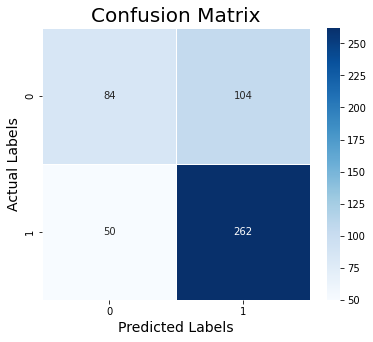

In [ ]:
cm = confusion_matrix(y_test,np.round(reg.predict(x_test)))
plt.figure(figsize = (6, 5))
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.732


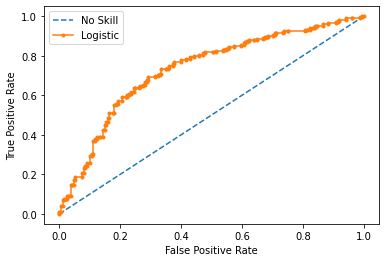

In [ ]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = reg.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

[5.30326152e-01 1.03349656e+01 1.44654900e+00 2.46664445e+00
 1.26008204e+00 3.48645157e+00 2.68778361e+00 3.31012368e-01
 3.72224586e-01 4.31112971e-03 3.26561830e-01 4.81989294e-02
 1.19091834e-01 1.02845306e+01 3.46938649e+00 1.44926424e+00
 3.15445410e+00 2.56533369e+00 7.53679694e+00 5.03817160e+00
 8.68924785e+00 1.88675312e+01 1.13716726e+01 4.15940760e+00]


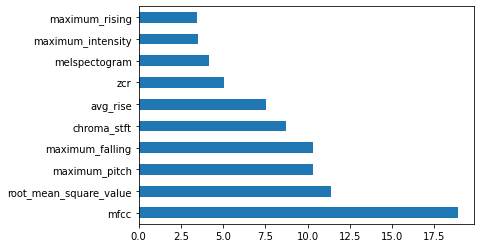

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
print(reg.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
score=cross_val_score(reg,x_test,y_test,cv=15,scoring="recall")

In [ ]:
np.mean(score)

0.7566666666666667

In [ ]:
# LGBM Classifier
lightgbm = make_pipeline(StandardScaler(),LGBMClassifier(
                
                  ))

# XGBoost Classifier
xgboost = make_pipeline(StandardScaler(),XGBClassifier(         
                  
                      ))

# KNN Classifier



# Bagging Classifier


# Gradient Boosting Classifier
gbr = GradientBoostingClassifier()  

# Random Forest Classifier
rf = RandomForestClassifier()
                  
# Cat Bosst Classifier
catb = CatBoostClassifier(task_type= 'GPU', 
                            verbose = False)

In [ ]:

print('stack_gen')
stack_gen_model = reg.fit(X_train,y_train)
print('lightgbm')
lgb_model_full_data = lightgbm.fit(X_train, y_train)
print('xgboost')
xgb_model_full_data = xgboost.fit(X_train, y_train)
print('RandomForest')
rf_model_full_data = rf.fit(X_train, y_train)
print('GradientBoosting')
gbr_model_full_data = gbr.fit(X_train, y_train)
print('CatBoosting')
cat_model_full_data = catb.fit(X_train, y_train)

stack_gen


lightgbm
xgboost
RandomForest
GradientBoosting
CatBoosting


In [ ]:
models=[]
models.append(cat_model_full_data)
models.append(gbr_model_full_data)
models.append(xgb_model_full_data)
models.append(lgb_model_full_data)
models.append(rf_model_full_data)
models.append(stack_gen_model)


In [ ]:
## Optimization

from scipy.optimize import minimize

predictions = []
for model in models:
    if model in ['stack_gen_model']:
        predictions.append(model.predict(np.array(X_train)))
    else:
        predictions.append(model.predict(X_train))
    

def mse_func(weights):
    #scipy minimize will pass the weights as a numpy array
    final_prediction = 0
    for weight, prediction in zip(weights, predictions):
            final_prediction += weight*prediction
    #return np.mean((y_test-final_prediction)**2)
    return np.sqrt(mean_squared_error(y_train, final_prediction))
    
starting_values = [0]*len(predictions)

cons = ({'type':'ineq','fun':lambda w: 1-sum(w)})
#our weights are bound between 0 and 1
bounds = [(0.05,1)]*len(predictions)

res = minimize(mse_func, starting_values, method='SLSQP', bounds=bounds, constraints=cons)

print('Ensamble Score: {best_score}'.format(best_score=res['fun']))
print('Best Weights: {weights}'.format(weights=res['x']))

mlist = [ 'cat', 'gbr' , 'xgb', 'lgb', 'rf', 'stack_gen']
blend_wts = pd.DataFrame({'model': mlist, 'optimised_wts': list(res['x'])}, columns=['model', 'optimised_wts'])

Ensamble Score: 0.07514800211730316
Best Weights: [0.05 0.05 0.05 0.05 0.75 0.05]


In [ ]:
# Blend models in order to make the final predictions more robust to overfitting
def blended_predictions(X):
      return ((0.0 * cat_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.05 * xgb_model_full_data.predict(X)) + \
            (0.05 * lgb_model_full_data.predict(X)) + \
            (0.8 * rf_model_full_data.predict(X)) + \
            (0.0 *stack_gen_model.predict(X)))

In [ ]:
blended_predictions(x_test)

array([1.  , 0.  , 0.  , 1.  , 1.  , 0.05, 0.8 , 1.  , 0.  , 1.  , 0.85,
       1.  , 0.  , 1.  , 1.  , 1.  , 1.  , 0.  , 1.  , 0.95, 1.  , 0.95,
       1.  , 0.  , 1.  , 1.  , 0.05, 0.1 , 1.  , 0.05, 1.  , 1.  , 1.  ,
       0.1 , 1.  , 0.95, 1.  , 1.  , 1.  , 1.  , 0.05, 1.  , 1.  , 1.  ,
       0.  , 1.  , 0.95, 0.95, 1.  , 0.95, 1.  , 0.9 , 0.  , 1.  , 0.  ,
       1.  , 0.95, 1.  , 0.9 , 1.  , 1.  , 1.  , 1.  , 1.  , 0.2 , 0.  ,
       1.  , 0.1 , 1.  , 0.95, 1.  , 0.15, 1.  , 1.  , 0.15, 1.  , 1.  ,
       0.1 , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.8 , 0.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 0.  , 1.  , 1.  , 0.05, 1.  , 1.  , 1.  ,
       1.  , 1.  , 0.85, 1.  , 1.  , 1.  , 0.9 , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 0.2 , 1.  , 0.  , 0.  , 0.8 , 1.  , 0.95,
       1.  , 0.  , 1.  , 1.  , 0.  , 1.  , 1.  , 0.95, 0.2 , 1.  , 1.  ,
       1.  , 0.15, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.  , 1.  , 1.  ,
       1.  , 0.  , 0.8 , 1.  , 1.  , 0.  , 1.  , 1.

In [ ]:
# Get final precitions from the blended model
blended_score = f1_score(y_test, np.round(blended_predictions(x_test)))
df_score.append(["blended",blended_score, 0])
print('F1 score on train data:')
print(blended_score)

F1 score on train data:
0.7755102040816327


In [ ]:
f1_score(y_test, np.round(blended_predictions(x_test))),recall_score(y_test, np.round(blended_predictions(x_test))),accuracy_score(y_test, np.round(blended_predictions(x_test)))

(0.7755102040816327, 0.8525641025641025, 0.692)